# CSE 5243 - Introduction to Data Mining
## Homework 2: Classification
- Semester: Fall 2022
- Instructor: Greg Ryslik
- Section: Wednesday 12:45
- Student Name: John Smith
- Name.#: smith.2@osu.edu
***

# Introduction

### Objectives

In this lab, you will use the "Cleveland Data CLEANED AND TRIMMED.csv" heart disease dataset provided on Carmen.  It is a subset of the "Cleveland" dataset that can be found here: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

You will configure, execute, and evaluate an off-the-shelf K-Nearest-Neighbor classifier and two other classifiers you choose.

The objectives of this assignment are:
1.	Understand how to evaluate classifiers based on business criteria.
2.	Understand how to tune and evaluate a classifier to achieve good performance.
3.	Understand how to select and evaluate suitable off-the-shelf classifiers based on the characteristics of a dataset and the outcomes you need.

### Problem Statement

You work for a medical institution that wants to improve the heart health of its patients.  You have obtained a dataset that contains a variety of demographic and health-related information for a group of patients.  It also includes a CLASS variable "num" that indicates the heart health of each of the patients.  The values are:

0. No heart health issues / risk
1. Slight heart health issues / risk
2. Moderate heart health issues / risk
3. High heart health issues / risk
4. Extreme heart health issue / risk

You have been asked to develop a classifier based on the dataset data, to predict the CLASS of new patients so they can be enrolled in interventions based on their demographic data.

The COSTs of the interventions are as follows, based on the predicted class of each patient

0) Tiny intervention: 100 (dollars)
1) Minor intervention: 200
2) Moderate intervention: 300
3) Significant intervention: 400
4) Extreme intervention: 500

The BENEFITs of the interventions are as follows:

- If the classification is correct and the correct intervention given to the patient: 500 * (TRUE_CLASS + 1)
- If an incorrect classification is made and the wrong intervention is given to the patient: 0

You would like to find a classifier that maximizes the overall **NET_BENEFIT = BENEFIT - COST**. Therefore, a larger positive number is a good outcome.

So, for example:

- If a patient's true class is 4 and their predicted class is 0, their NET_BENEFIT = 0 - 100 = -100
- If a patient's true class is 4 and they are correctly classified, their NET_BENEFIT is 500*(4+1) - 500 = 2000

The medical institution would like you to evaluate the use of a K-Nearest-Neighbor classifier as a starting point.  You agree to do so, as long as you then can choose a different classifier if you are not satisfied with KNN.

### Collaboration
For this assignment, you should work as an individual. You may informally discuss ideas with classmates, but your work should be your own.

### What you need to turn in:
1)	Code

-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	You may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…  See reference below.) 
-	You may not use library operations that perform, in effect, the “core” computations for this homework (e.g., If the assignment is to write a K-Means algorithm, you may not use a library operation that, in effect, does the core work needed to implement a K-Means algorithm.).  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2)	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### Grading

1.	Overall readability and organization of your report (5%)
> - Is it well organized and does the presentation flow in a logical manner?
> - Are there no grammar and spelling mistakes?
> - Do the charts/graphs relate to the text?
> - Are the summarized key points and findings understandable by non-experts?
> - Do the Overview and Conclusions provide context for the entire exercise?
2.	Evaluation Method (10%)
> - Does your evaluation method meet the needs of the developer (you) as well as the needs of your business stakeholders?
> - Is the evaluation method sound?
> - Did you describe both the method itself and why you chose it?
3.	Pre-Processing of the Dataset (10%)
> - Did you make reasonable choices for pre-processing, and explain why you made them?
4.	Evaluation of the KNN Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
5.	Evaluation of the Second Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
6.	Evaluation of the Third Classifier (20%)
> - Is your algorithm design and coding correct?
> - Is it well documented?
> - Have you made an effort to tune it for good performance?
> - Is the evaluation sound?
7.	Comparison of the Three Classifiers (10%)
> - Is the comparison sound?
> - Did you choose a specific classifier as best and explain why?
8.  Conclusions (5%)
> - Did you summarize appropriately your critical findings. 
> - Did you provide appropriate conclusions and next steps.

### How to turn in your work on Carmen:

Submit to Carmen the Jupyter Notebook, the html print out of your Jupyter notebook, and any supporting files that you used to process and analyze this data. You do not need to include the input data.  All submitted files (code and/or report) except for the data should be archived in a *.zip file, and submitted via Carmen.  Use this naming convention:
 
•	HW2_Surname_DotNumber.zip

The submitted file should be less than 10MB.

***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

- Understand the task and define the evaluation Method
- Pre-Processing of the dataset
- Building and evaluation of three Classifier
- Comparison of the Three Classifiers

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, chi2
from sklearn.preprocessing import MinMaxScaler
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,roc_curve,accuracy_score, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.feature_selection import SelectKBest, chi2

***
# Section: 1 - Evaluation Method
- Define measures for evaluating the classification models you develop.  Explain why the measures you choose provide a useful view into the value and usefulness of the model you eventually chose for the company to use.  Define two types:
***

***
## Section: 1.1 - Define measures that do not include the cost information
- (e.g., confusion matrices, accuracy, precision, recall, F-measures, etc.).
- Consider using: from sklearn.metrics import classification_report, confusion_matrix
***

classification report

- sklearn.metrics.classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)
- return: String( including: precision, recall, F-measures, macro avg, micro avg)

confusion matrix

- sklearn.metrics.confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
- return: array, shape=[classes num, classes num], confusion matrices

***
## Section: 1.2 - Define measures that do include the cost information
- (e.g., using cost matrices).
- Consider creating a function that takes a confusion matrix and calculates the cost, like this:
***

In [3]:
def calculate_cost(conf_matrix):
    cost_matrix = [[ 100,   200,  300,  400,  500],
                    [ 100,   200,  300,  400,  500],
                    [ 100,   200,  300,  400,  500],
                    [ 100,   200,  300,  400,  500],
                    [ 100,   200,  300,  400,  500]]
    total = 0
    for r in range(0, 5):
        for c in range(0, 5):
            total = total + cost_matrix[r][c] * conf_matrix[r][c]
    return total

In [4]:
def calculate_benefit(conf_matrix):
    cost_matrix = [[ 500,    0,    0,    0,    0],
                  [   0,  1000,   0,    0,    0],
                  [   0,    0,  1500,   0,    0],
                  [   0,    0,    0,  2000,   0],
                  [   0,    0,    0,    0, 2500]]
    total = 0
    for r in range(0, 5):
        for c in range(0, 5):
            total = total + cost_matrix[r][c] * conf_matrix[r][c]
    return total

In [5]:
def calculate_net_benefit(conf_matrix):
    cost = calculate_cost(conf_matrix)
    benefit = calculate_benefit(conf_matrix)
    net_benefit = calculate_benefit(conf_matrix) - calculate_cost(conf_matrix)
    return net_benefit

***
# Section: 2 - Pre-Processing of the Dataset
- Use the provided dataset.  Split it into a Training dataset and a Test dataset based on the class attribute.  Keep them separate and use the Training dataset for training/tuning and the Test dataset for testing. For consistency, use the **train_test_split** operation available in SciKit Learn (use a specific random seed, so it is reproducible).
  - from sklearn.model_selection import train_test_split
  - X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
***

***
## Section: 2.1 - Explore the attributes
- As in Homework 1, explore the attributes briefly. Reference the website listed in the Introduction.
- Provide basic statistics for the attributes.
- List which attributes are Nominal (even though they are encoded as numbers), Ordinal, Interval, Ratio.
***

In [38]:
data = pd.read_csv("Cleveland Data CLEANED AND TRIMMED.csv",header = 0, names = ['id','age','sex','pain','blood_pressure','chol','blood_sugar','electrocardiographic','max_heartrate','exercise_angina','oldpeak','slope','vessels_num','thal','diagnosis'])
data
#rows represent:

,id,age,sex,pain,blood_pressure,chol,blood_sugar,electrocardiographic,max_heartrate,exercise_angina,oldpeak,slope,vessels_num,thal,diagnosis
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,278,39,0,3,138,220,0,0,152,0,0.0,2,0,3,0
278,279,57,1,2,154,232,0,2,164,0,0.0,1,1,3,1
279,280,58,0,4,130,197,0,0,131,0,0.6,2,0,3,0
280,281,57,1,4,110,335,0,0,143,1,3.0,2,1,7,2


In [39]:
data.describe()

,id,age,sex,pain,blood_pressure,chol,blood_sugar,electrocardiographic,max_heartrate,exercise_angina,oldpeak,slope,vessels_num,thal,diagnosis
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,141.500000,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.595745,4.581560,0.907801
std,81.550598,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,1.236910,2.248467,1.224894
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-9.000000,-9.000000,0.000000
25%,71.250000,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,141.500000,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,211.750000,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,282.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


### atrribute types
- ordinal: id, age, trestbps, chol, thalach, oldpeak, ca
- nominal: sex, cp, restecg, exang, slope, thal, num
- interval: fbs

### Change all the missing values to the average value of that feature WITHIN the specfic outcome group.

In [40]:
def change_missing(att):
    list_a = []
    list_b = []
    list_c = []
    list_d = []
    list_e = []
    for i in data.index:
        if data.at[i,'diagnosis']==0 and data.at[i,att]!= -9:
                list_a.append(data.at[i,att])
        if data.at[i,'diagnosis']==1 and data.at[i,att]!= -9:
                list_b.append(data.at[i,att]) 
        if data.at[i,'diagnosis']==2 and data.at[i,att]!= -9:
                list_c.append(data.at[i,att])
        if data.at[i,'diagnosis']==3 and data.at[i,att]!= -9:
                list_d.append(data.at[i,att])
        if data.at[i,'diagnosis']==4 and data.at[i,att]!= -9:
                list_d.append(data.at[i,att])
    mean1=np.mean(list_a)
    mean2=np.mean(list_b)
    mean3=np.mean(list_c)
    mean4=np.mean(list_d)
    mean5=np.mean(list_e)
    for i in data.index:
        if data.at[i,'diagnosis']==0 and data.at[i,att]== -9:
            data.at[i,att]= mean1
        if data.at[i,'diagnosis']==1 and data.at[i,att]== -9:
            data.at[i,att]= mean2
        if data.at[i,'diagnosis']==2 and data.at[i,att]== -9:
            data.at[i,att]= mean3
        if data.at[i,'diagnosis']==3 and data.at[i,att]== -9:
            data.at[i,att]= mean4
        if data.at[i,'diagnosis']==4 and data.at[i,att]== -9:
            data.at[i,att]= mean5
change_missing('vessels_num')
change_missing('thal')
data.describe()

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,id,age,sex,pain,blood_pressure,chol,blood_sugar,electrocardiographic,max_heartrate,exercise_angina,oldpeak,slope,vessels_num,thal,diagnosis
count,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000,282.000000
mean,141.500000,54.411348,0.677305,3.163121,131.563830,249.092199,0.148936,1.014184,149.765957,0.326241,1.026950,1.585106,0.659574,4.673759,0.907801
std,81.550598,9.053083,0.468338,0.955405,17.757496,51.217546,0.356658,0.998118,22.923869,0.469670,1.138825,0.609700,0.934356,1.934870,1.224894
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,71.250000,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,141.500000,55.000000,1.000000,3.000000,130.000000,244.000000,0.000000,2.000000,153.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,211.750000,61.000000,1.000000,4.000000,140.000000,277.000000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,282.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [41]:
data.mean()

id                      141.500000
age                      54.411348
sex                       0.677305
pain                      3.163121
blood_pressure          131.563830
chol                    249.092199
blood_sugar               0.148936
electrocardiographic      1.014184
max_heartrate           149.765957
exercise_angina           0.326241
oldpeak                   1.026950
slope                     1.585106
vessels_num               0.659574
thal                      4.673759
diagnosis                 0.907801
dtype: float64

In [42]:
data.median()

id                      141.5
age                      55.0
sex                       1.0
pain                      3.0
blood_pressure          130.0
chol                    244.0
blood_sugar               0.0
electrocardiographic      2.0
max_heartrate           153.5
exercise_angina           0.0
oldpeak                   0.8
slope                     2.0
vessels_num               0.0
thal                      3.0
diagnosis                 0.0
dtype: float64

In [43]:
data.std()

id                      81.550598
age                      9.053083
sex                      0.468338
pain                     0.955405
blood_pressure          17.757496
chol                    51.217546
blood_sugar              0.356658
electrocardiographic     0.998118
max_heartrate           22.923869
exercise_angina          0.469670
oldpeak                  1.138825
slope                    0.609700
vessels_num              0.934356
thal                     1.934870
diagnosis                1.224894
dtype: float64

In [44]:
data.var()

id                      6650.500000
age                       81.958305
sex                        0.219341
pain                       0.912799
blood_pressure           315.328651
chol                    2623.237021
blood_sugar                0.127205
electrocardiographic       0.996239
max_heartrate            525.503748
exercise_angina            0.220590
oldpeak                    1.296922
slope                      0.371735
vessels_num                0.873022
thal                       3.743722
diagnosis                  1.500366
dtype: float64

In [45]:
data.mad()

id                      70.500000
age                      7.452241
sex                      0.437126
pain                     0.789397
blood_pressure          13.706730
chol                    38.704190
blood_sugar              0.253508
electrocardiographic     0.992807
max_heartrate           18.467482
exercise_angina          0.439616
oldpeak                  0.912253
slope                    0.560208
vessels_num              0.785876
thal                     1.899301
diagnosis                1.010814
dtype: float64

In [46]:
data.quantile(q = [0, 0.01, .1, .25, .5, .75, .9, .99, 1])

,id,age,sex,pain,blood_pressure,chol,blood_sugar,electrocardiographic,max_heartrate,exercise_angina,oldpeak,slope,vessels_num,thal,diagnosis
0.00,1.00,29.00,0.0,1.0,94.0,126.00,0.0,0.0,71.00,0.0,0.0,1.0,0.0,3.0,0.0
0.01,3.81,34.81,0.0,1.0,100.0,149.00,0.0,0.0,95.81,0.0,0.0,1.0,0.0,3.0,0.0
0.10,29.10,42.00,0.0,2.0,110.0,196.00,0.0,0.0,116.00,0.0,0.0,1.0,0.0,3.0,0.0
0.25,71.25,48.00,0.0,3.0,120.0,213.00,0.0,0.0,133.25,0.0,0.0,1.0,0.0,3.0,0.0
0.50,141.50,55.00,1.0,3.0,130.0,244.00,0.0,2.0,153.50,0.0,0.8,2.0,0.0,3.0,0.0
0.75,211.75,61.00,1.0,4.0,140.0,277.00,0.0,2.0,165.75,1.0,1.6,2.0,1.0,7.0,2.0
0.90,253.90,66.00,1.0,4.0,152.0,308.90,1.0,2.0,177.90,1.0,2.6,2.0,2.0,7.0,3.0
0.99,279.19,71.57,1.0,4.0,180.0,407.38,1.0,2.0,192.38,1.0,4.2,3.0,3.0,7.0,4.0
1.00,282.00,77.00,1.0,4.0,200.0,564.00,1.0,2.0,202.00,1.0,6.2,3.0,3.0,7.0,4.0


In [47]:
data.max(numeric_only = True) - data.min(numeric_only = True)

id                      281.0
age                      48.0
sex                       1.0
pain                      3.0
blood_pressure          106.0
chol                    438.0
blood_sugar               1.0
electrocardiographic      2.0
max_heartrate           131.0
exercise_angina           1.0
oldpeak                   6.2
slope                     2.0
vessels_num               3.0
thal                      4.0
diagnosis                 4.0
dtype: float64

In [48]:
data.quantile(.75) - data.quantile(.25)

id                      140.5
age                      13.0
sex                       1.0
pain                      1.0
blood_pressure           20.0
chol                     64.0
blood_sugar               0.0
electrocardiographic      2.0
max_heartrate            32.5
exercise_angina           1.0
oldpeak                   1.6
slope                     1.0
vessels_num               1.0
thal                      4.0
diagnosis                 2.0
dtype: float64

***
## Section: 2.2 - Revise the dataset
- Review the meanings of the attributes and consider removing redundant or (likely) irrelevant attributes, combining attributes, etc., to reduce the number of attributes.
- (You may choose to use techniques such as those you used in Homework 1 to analyze the impacts of individual attributes on the CLASS attribute, but you need not do a “deep” analysis.)
- Describe what you chose to do (and not do), and why.
***

### correlation analysis

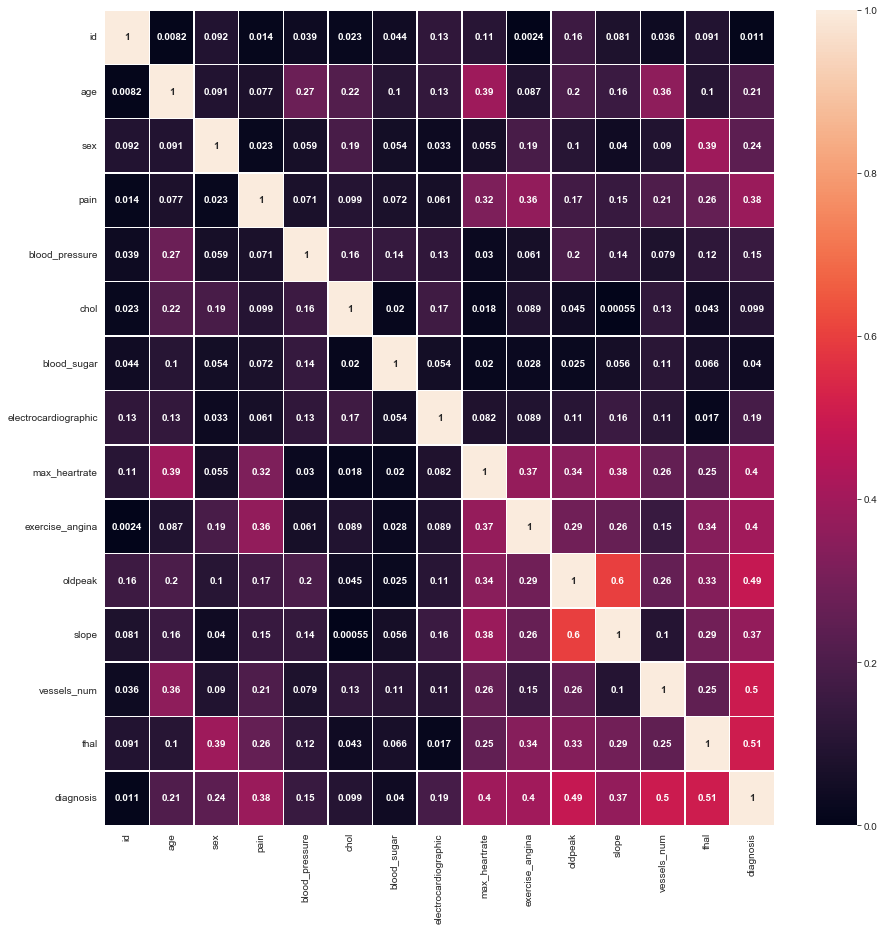

In [49]:
correlations = data.corr() 
correction=abs(correlations)
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = sns.heatmap(correction, linewidths=0.5,vmax=1, vmin=0 ,annot=True,annot_kws={'size':10,'weight':'bold'})
plt.xticks(np.arange(15)+0.5) 
plt.yticks(np.arange(15)+0.5) 
plt.show()

### From the correlation we can finde that 'id','blood_sugar','chol' are barely correlated with diagnosis (pcc<0.1), so we can remove them

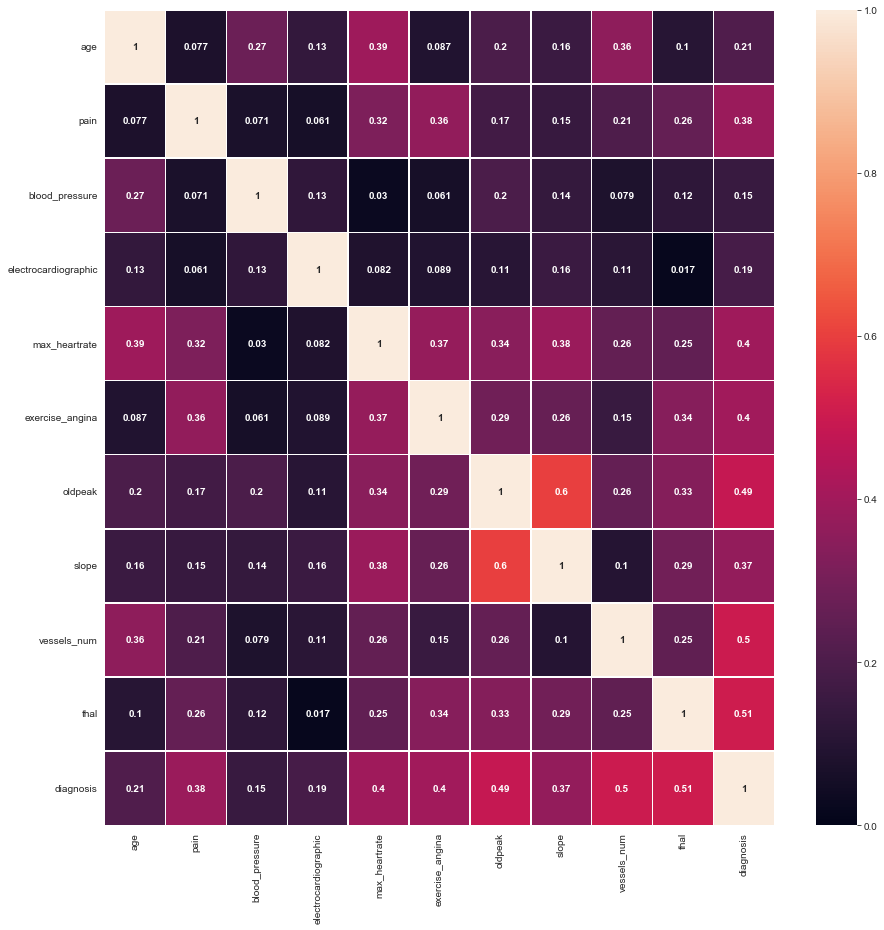

In [50]:
data=data.drop(columns=['id','sex','blood_sugar','chol'])
correlations = data.corr() 
correction=abs(correlations)
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = sns.heatmap(correction, linewidths=0.5,vmax=1, vmin=0 ,annot=True,annot_kws={'size':10,'weight':'bold'})
plt.xticks(np.arange(11)+0.5) 
plt.yticks(np.arange(11)+0.5) 
plt.show()

***
## Section: 2.3 - Transform the attributes
- Consider transforming the remaining attributes (e.g., using the data dictionary to replace the numbers with text values for some attributes – this might or might not be useful), normalizing / scaling values, encoding labels (if necessary), etc.
- Describe what you chose to do (and not do), and why.
***

In [51]:
data_transform=data.copy()
col_names = ["age","pain","blood_pressure","electrocardiographic","max_heartrate","exercise_angina","oldpeak","slope","vessels_num","thal"]
features = data_transform[col_names]
scaler = MinMaxScaler(feature_range=(0,1))
data_transform[col_names] = scaler.fit_transform(features.values)
data_transform

,age,pain,blood_pressure,electrocardiographic,max_heartrate,exercise_angina,oldpeak,slope,vessels_num,thal,diagnosis
0,0.708333,0.000000,0.481132,1.0,0.603053,0.0,0.370968,1.0,0.000000,0.75,0
1,0.791667,1.000000,0.622642,1.0,0.282443,1.0,0.241935,0.5,1.000000,0.00,2
2,0.791667,1.000000,0.245283,1.0,0.442748,1.0,0.419355,0.5,0.666667,1.00,1
3,0.166667,0.666667,0.339623,0.0,0.885496,0.0,0.564516,1.0,0.000000,0.00,0
4,0.250000,0.333333,0.339623,1.0,0.770992,0.0,0.225806,0.0,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...
277,0.208333,0.666667,0.415094,0.0,0.618321,0.0,0.000000,0.5,0.000000,0.00,0
278,0.583333,0.333333,0.566038,1.0,0.709924,0.0,0.000000,0.0,0.333333,0.00,1
279,0.604167,1.000000,0.339623,0.0,0.458015,0.0,0.096774,0.5,0.000000,0.00,0
280,0.583333,1.000000,0.150943,0.0,0.549618,1.0,0.483871,0.5,0.333333,1.00,2


***
# Section: 3 - Evaluation of the Off-The-Shelf KNN Classifier
- Select the KNN classifier from the SciKit Learn library and run it on the dataset.
***

***
## Section: 3.1 - Configure the off-the-shelf KNN classifier
- Use the KNeighborsClassifier from the SciKit Learn library
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [52]:
#split data to train and test
X_train, X_test, y_train, y_test = train_test_split(data_transform[["age","blood_pressure","electrocardiographic","max_heartrate","exercise_angina","oldpeak","vessels_num","thal"]], data_transform[['diagnosis']], test_size=0.33, random_state=42)

# Instantiate learning model (k = 3)
knn_clf = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
knn_clf.fit(X_train, y_train.squeeze())

# Predicting the Test set results
knn_y_pred = knn_clf.predict(X_test)
knn_y_pred

array([3, 0, 0, 0, 0, 3, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0, 4, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0])

In [21]:
knn_cm = confusion_matrix(y_test, knn_y_pred)
knn_cm

array([[48,  1,  3,  0,  0],
       [11,  2,  2,  1,  0],
       [ 3,  3,  0,  1,  0],
       [ 6,  6,  2,  0,  0],
       [ 2,  1,  0,  1,  1]])

In [22]:
knn_accuracy = accuracy_score(y_test, knn_y_pred)*100
print('Accuracy of our model is equal ' + str(round(knn_accuracy, 2)) + ' %.')

Accuracy of our model is equal 54.26 %.


***
## Section: 3.2 - Run and evaluate the classifier
- Try several values of the K parameter and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [23]:
# creating list of K for KNN 
# What if you want to do Leave-One-Out Cross Validation

k_list = list(range(1,50))
# creating list of cv scores
knn_cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn_scores = cross_val_score(knn, X_train, y_train.squeeze(), cv=7, scoring='accuracy')
    knn_cv_scores.append(knn_scores.mean())

knn_cv_scores[0:50]

[0.5370370370370371,
 0.5582010582010583,
 0.559015059015059,
 0.5799755799755799,
 0.5960520960520961,
 0.5746845746845748,
 0.5586080586080585,
 0.568986568986569,
 0.5636955636955637,
 0.5531135531135531,
 0.568986568986569,
 0.568986568986569,
 0.5848595848595848,
 0.5795685795685795,
 0.568986568986569,
 0.5901505901505901,
 0.5795685795685797,
 0.5636955636955637,
 0.5317460317460317,
 0.5423280423280423,
 0.5423280423280423,
 0.5582010582010581,
 0.5423280423280424,
 0.5476190476190477,
 0.5531135531135531,
 0.5582010582010583,
 0.5582010582010583,
 0.5742775742775743,
 0.5795685795685795,
 0.5742775742775742,
 0.5742775742775742,
 0.5582010582010583,
 0.5687830687830687,
 0.5687830687830687,
 0.5846560846560847,
 0.5742775742775743,
 0.5797720797720798,
 0.568986568986569,
 0.568986568986569,
 0.5636955636955637,
 0.5742775742775743,
 0.568986568986569,
 0.5797720797720798,
 0.5742775742775742,
 0.5797720797720797,
 0.5797720797720797,
 0.5691900691900692,
 0.5691900691900692,


<Figure size 432x288 with 0 Axes>

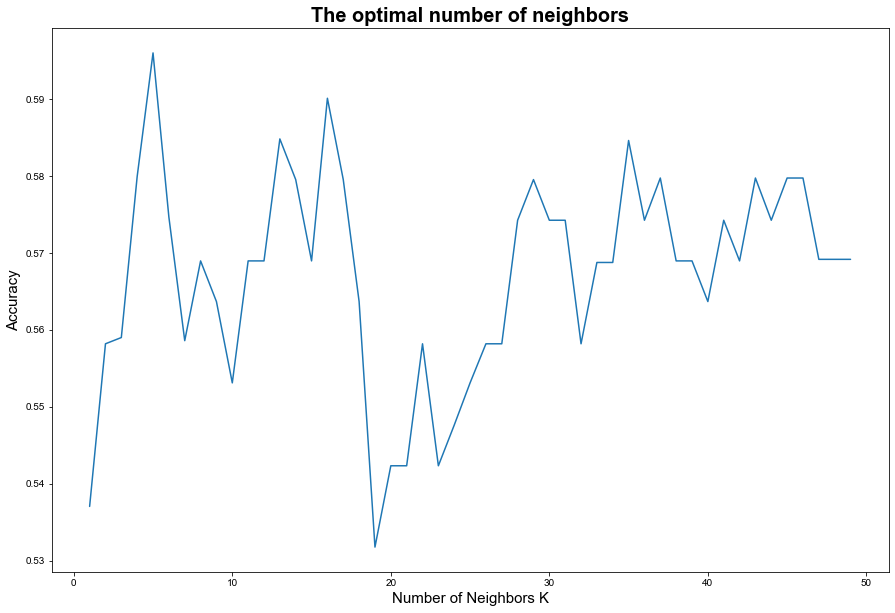

In [24]:
# Modeled from: https://www.kaggle.com/skalskip/iris-data-visualization-and-knn-classification

def optimal_knn_value (k_list, knn_cv_scores):

    plt.figure()
    plt.figure(figsize=(15,10))
    plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
    plt.xlabel('Number of Neighbors K', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    sns.set_style("whitegrid")
    plt.plot(k_list, knn_cv_scores)
    plt.show()
    
optimal_knn_value(k_list, knn_cv_scores)

#Looks like around 3 KNN

In [25]:
X_train, X_test, y_train, y_test = train_test_split(data_transform[["age","blood_pressure","electrocardiographic","max_heartrate","exercise_angina","oldpeak","vessels_num","thal"]], data_transform['diagnosis'], test_size=0.33, random_state=42)

# Instantiate learning model (k = 2)
knn_clf = KNeighborsClassifier(n_neighbors=2)

# Fitting the model
knn_clf.fit(X_train, y_train.squeeze())

# Predicting the Test set results
knn_y_pred = knn_clf.predict(X_test)
knn_y_pred

array([2, 0, 0, 0, 0, 2, 0, 1, 2, 3, 1, 0, 1, 0, 0, 0, 0, 4, 0, 2, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 2, 0, 3, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0])

In [26]:
classification_report(y_test, knn_y_pred, labels=None, target_names=None, sample_weight=None, digits=2)

'              precision    recall  f1-score   support\n\n           0       0.68      0.90      0.78        52\n           1       0.21      0.19      0.20        16\n           2       0.14      0.14      0.14         7\n           3       0.33      0.07      0.12        14\n           4       1.00      0.20      0.33         5\n\n    accuracy                           0.56        94\n   macro avg       0.47      0.30      0.31        94\nweighted avg       0.53      0.56      0.51        94\n'

In [27]:
knn_confusion_matrix=confusion_matrix(y_test, knn_y_pred, labels=None, sample_weight=None)
knn_confusion_matrix

array([[47,  2,  3,  0,  0],
       [12,  3,  1,  0,  0],
       [ 1,  4,  1,  1,  0],
       [ 7,  4,  2,  1,  0],
       [ 2,  1,  0,  1,  1]])

In [63]:
knn_benefit=calculate_net_benefit(knn_confusion_matrix)
knn_benefit

19000

***
## Section: 3.3 - Evaluate the choice of the KNN classifier
- What characteristics of the problem and data made KNN a good or bad choice?
***

### Problem

- The percentages for each category vary widely, with "0" accounting for more than all the other categories combined. Because “0” make up such a large proportion, many other categories are wrongly predicted to be zeros.

- Some categories have too few totals, such as "4". When K=2, there is no prediction for "4".

- All categories are not distinguished clearly in the feature space, so the prediction effect is poor. In addition, with the change of K, the fluctuation of prediction effect also indicates that the distribution of categories in the feature space is irregular.

***
# Section: 4 - Evaluation of Off-The-Shelf Classifier #2
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 4.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [53]:
#SVM model
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
#Fit the model for the data

classifier.fit(X_train, y_train)

#Make prediction
svm_y_pred = classifier.predict(X_test)
svm_y_pred

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 3, 0, 0, 3, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0])

***
## Section: 4.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [54]:
svm_cm = confusion_matrix(y_test, svm_y_pred)
print(svm_cm)

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 7)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


[[51  0  1  0  0]
 [ 9  6  1  0  0]
 [ 2  2  3  0  0]
 [ 3  5  4  2  0]
 [ 2  1  1  1  0]]
Accuracy: 52.71 %
Standard Deviation: 7.34 %


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [55]:
classification_report(y_test, svm_y_pred, labels=None, target_names=None, sample_weight=None, digits=2)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.76      0.98      0.86        52\n           1       0.43      0.38      0.40        16\n           2       0.30      0.43      0.35         7\n           3       0.67      0.14      0.24        14\n           4       0.00      0.00      0.00         5\n\n    accuracy                           0.66        94\n   macro avg       0.43      0.39      0.37        94\nweighted avg       0.62      0.66      0.60        94\n'

In [56]:
svm_benefit=calculate_net_benefit(svm_cm)
svm_benefit

26300

***
## Section: 4.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

### Problem

- The percentages for each category vary widely, with "0" accounting for more than all the other categories combined. Because “0” make up such a large proportion, many other categories are wrongly predicted to be zeros.

- Some categories have too few totals, such as "4". There is no prediction for "4".

- All categories are not distinguished clearly in the feature space, so the prediction effect is poor.

***
# Section: 5 - Evaluation of Off-The-Shelf Classifier #3
- As with the KNN classifier above, choose another classifier from the SciKit Learn library (Decision Tree, SVM, Logistic Regression, etc.) and run it on the dataset.
***

***
## Section: 5.1 - Configure the classifier
- Use the appropriate classifier from the SciKit Learn library.
- Explain all setup, parameters and execution options you chose to set, and why.
***

In [57]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rf_clf=RandomForestClassifier(n_estimators=1000)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_clf.fit(X_train,y_train.squeeze())

rf_y_pred=rf_clf.predict(X_test)

rf_y_pred

array([2, 0, 0, 0, 0, 2, 0, 3, 2, 3, 1, 0, 2, 2, 0, 2, 0, 4, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 3, 0, 3, 0, 2, 0, 0, 3, 3, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 3, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 3, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0])

***
## Section: 5.2 - Run and evaluate the classifier
- Try several values of the parameters (if appropriate) and compare the results.
- Evaluate the performance of the classifier, using the evaluation method you defined above.
***

In [58]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
print(rf_cm)
rf_accuracy = accuracy_score(y_test, rf_y_pred)*100
print('Accuracy of our model is equal ' + str(round(rf_accuracy, 2)) + ' %.')

[[48  0  4  0  0]
 [11  1  2  2  0]
 [ 0  3  1  3  0]
 [ 4  4  3  2  1]
 [ 1  1  1  1  1]]
Accuracy of our model is equal 56.38 %.


In [59]:
rf_y_scores = rf_clf.predict_proba(X_test)
rf_y_scores[0:10,:]

array([[0.1  , 0.107, 0.465, 0.289, 0.039],
       [0.871, 0.125, 0.001, 0.003, 0.   ],
       [0.431, 0.364, 0.024, 0.097, 0.084],
       [0.665, 0.176, 0.1  , 0.034, 0.025],
       [0.594, 0.204, 0.102, 0.059, 0.041],
       [0.32 , 0.052, 0.348, 0.178, 0.102],
       [0.678, 0.099, 0.174, 0.026, 0.023],
       [0.253, 0.232, 0.163, 0.292, 0.06 ],
       [0.138, 0.175, 0.434, 0.084, 0.169],
       [0.215, 0.191, 0.258, 0.314, 0.022]])

In [60]:
classification_report(y_test, rf_y_pred, labels=None, target_names=None, sample_weight=None, digits=2)

'              precision    recall  f1-score   support\n\n           0       0.75      0.92      0.83        52\n           1       0.11      0.06      0.08        16\n           2       0.09      0.14      0.11         7\n           3       0.25      0.14      0.18        14\n           4       0.50      0.20      0.29         5\n\n    accuracy                           0.56        94\n   macro avg       0.34      0.29      0.30        94\nweighted avg       0.50      0.56      0.52        94\n'

In [61]:
rf_benefit=calculate_net_benefit(rf_cm)
rf_benefit

17300

***
## Section: 5.3 - Evaluate the choice of the classifier
- What characteristics of the problem and data made the classifier a good or bad choice?
***

### Problem

- The percentages for each category vary widely, with "0" accounting for more than all the other categories combined. Because “0” make up such a large proportion, many other categories are wrongly predicted to be zeros.

- Some categories have too few totals, such as "4". There is no prediction for "4".

- All categories are not distinguished clearly in the feature space, so the prediction effect is poor.

***
# Section: 6 - Comparison of the Three Classifiers
***

***
## Section: 6.1 - Compare the performance of these classifiers to each other
- What are their strong and weak points?
***

#### Accuracy

- KNN (K=2):54.26 %.

- SVM: 52.71 %

- Random Forests:56.38 % 

#### Benefit

- KNN (K=2):19000

- SVM: 26300
- Random Forests:17300

#### Compare the performance

- Random Forests has better acuuracy.

- SVM has better Net Benefit

***
## Section: 6.2 - Choose a Best Classifier
- Choose one of the three classifiers as best and explain why.
***

- From the patient's point of view, patients would rather be misjudged as sick than sick but judged as not sick. Unfortunately, all three are disappointing. Many sick people are judged to be free of disease.

- From an economic point of view, of course, SVM is the best classifier, because it has the most benefits.

- Since the accuaries of all these three methods are all bad, we should not choose any of them. We need to explore more methods or features to improve the classification accuary. 

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

- First of all, this data set could be problematic. For example, the sample size of the five categories is not even. Moreover, the distribution of the five samples in the feature space may not be consistent with the actual situation. So the results of all three classifiers are very poor.

- Even if there were some problems with the data set, I still thought it was a great exercise. I learned how to use a variety of classifiers and how to evaluate them. At the same time, the clever of homework design lies in the concept of benefits equation. This makes me understand that classifiers can bring direct benefits in practical applications.

- In future tasks, I will make comprehensive use of the advantages of these classifiers to complete better classification and predict more meaningful benefits.

***
### END-OF-SUBMISSION
***